<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 4)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Detected Cases of Malaria)

This dataset consists of data for countries with an active malaria outbreak.
<br>

Attribute Information:

**Cases_Guinea**: Number of cases of malaria reported from Guinea

**Cases_Liberia**: Number of cases of malaria reported from Liberia

**Cases_SierraLeone**: Number of cases of malaria reported from Sierra Leone

**Cases_Nigeria**: Number of cases of malaria reported from Nigeria

**Cases_Senegal**: Number of cases of malaria reported from Senegal

**Cases_UnitedStates**: Number of cases of malaria reported from the United States of America

**Cases_Spain**: Number of cases of malaria reported from Spain

**Cases_Mali**: Number of cases of malaria reported from Mali

**Deaths_Guinea**: Number of deaths reported out of the detected cases of malaria from Guinea

**Deaths_Liberia**: Number of deaths reported out of the detected cases of malaria from Liberia

**Deaths_SierraLeone**: Number of deaths reported out of the detected cases of malaria from Sierra Leone

**Deaths_Nigeria**: Number of deaths reported out of the detected cases of malaria from Nigeria

**Deaths_Senegal**: Number of deaths reported out of the detected cases of malaria from Senegal

**Deaths_UnitedStates**: Number of deaths reported out of the detected cases of malaria from the United States of America

**Deaths_Spain**: Number of deaths reported out of the detected cases of malaria from Spain

**Deaths_Mali**: Number of deaths reported out of the detected cases of malaria from Mali

##  Table of Content

1. **[Missing Values Detection](#msv)**
2. **[Handling Missing Values](#hmsv)**
3. **[Outlier Detection Techniques](#out)**
4. **[Treatment of Outliers](#odt)**
5. **[Feature Engineering](#fe)**
6. **[Train-Test Split](#split)**

**Import the required libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

#### Load the malaria dataset and display the first five records (Use for section 1, 2)

In [2]:
df = pd.read_csv("malaria.csv")
df.head()

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2769.0,8166.0,9722.0,NaN,NaN,20.0,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,3.0,NaN,NaN
3,NaN,8157.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,8.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Let's begin with some hands-on practice exercises

<a id="msv"> </a>
## 1. Missing Values Detection

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are there any records where no data has been reported?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
df.columns

Index(['Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone', 'Cases_Nigeria',
       'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain', 'Cases_Mali',
       'Deaths_Guinea', 'Deaths_Liberia', 'Deaths_SierraLeone',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_UnitedStates',
       'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')

In [4]:
df.isnull().any(axis=1).sum()

126

In [5]:
df.isnull().sum()

Cases_Guinea            34
Cases_Liberia           44
Cases_SierraLeone       40
Cases_Nigeria           89
Cases_Senegal          102
Cases_UnitedStates      54
Cases_Spain            111
Cases_Mali             115
Deaths_Guinea           35
Deaths_Liberia          46
Deaths_SierraLeone      40
Deaths_Nigeria          89
Deaths_Senegal         105
Deaths_UnitedStates     70
Deaths_Spain           111
Deaths_Mali            115
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Find a list of all the columns which have more than 60% of their values missing</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
missing_value_percent = df.isnull().mean()
column_60_missing = missing_value_percent[missing_value_percent > 0.6].index
column_60_missing 

Index(['Cases_Nigeria', 'Cases_Senegal', 'Cases_Spain', 'Cases_Mali',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')

In [7]:
df.isnull().sum().any()

True

If the output of the code is an empty list, it means that there are no columns in the DataFrame with more than 60% missing values. This could be because there are no missing values in the DataFrame, or because the percentage of missing values in all the columns is less than 60%.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. In a scenario where one of the countries detected with malaria outbreak is to be recorded again for observations, which country should be considered first (consider only the first four countries)?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
# Select the first four countries
first_four_countries = df[['Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone', 'Cases_Nigeria']]

# Find the country with the highest number of cases
highest_cases = first_four_countries.idxmax(axis=1)

# Print the country with the highest number of cases
highest_cases.head(4)

0    Cases_SierraLeone
1    Cases_SierraLeone
2    Cases_SierraLeone
3        Cases_Liberia
dtype: object

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Visualize the missing values in the data</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:>

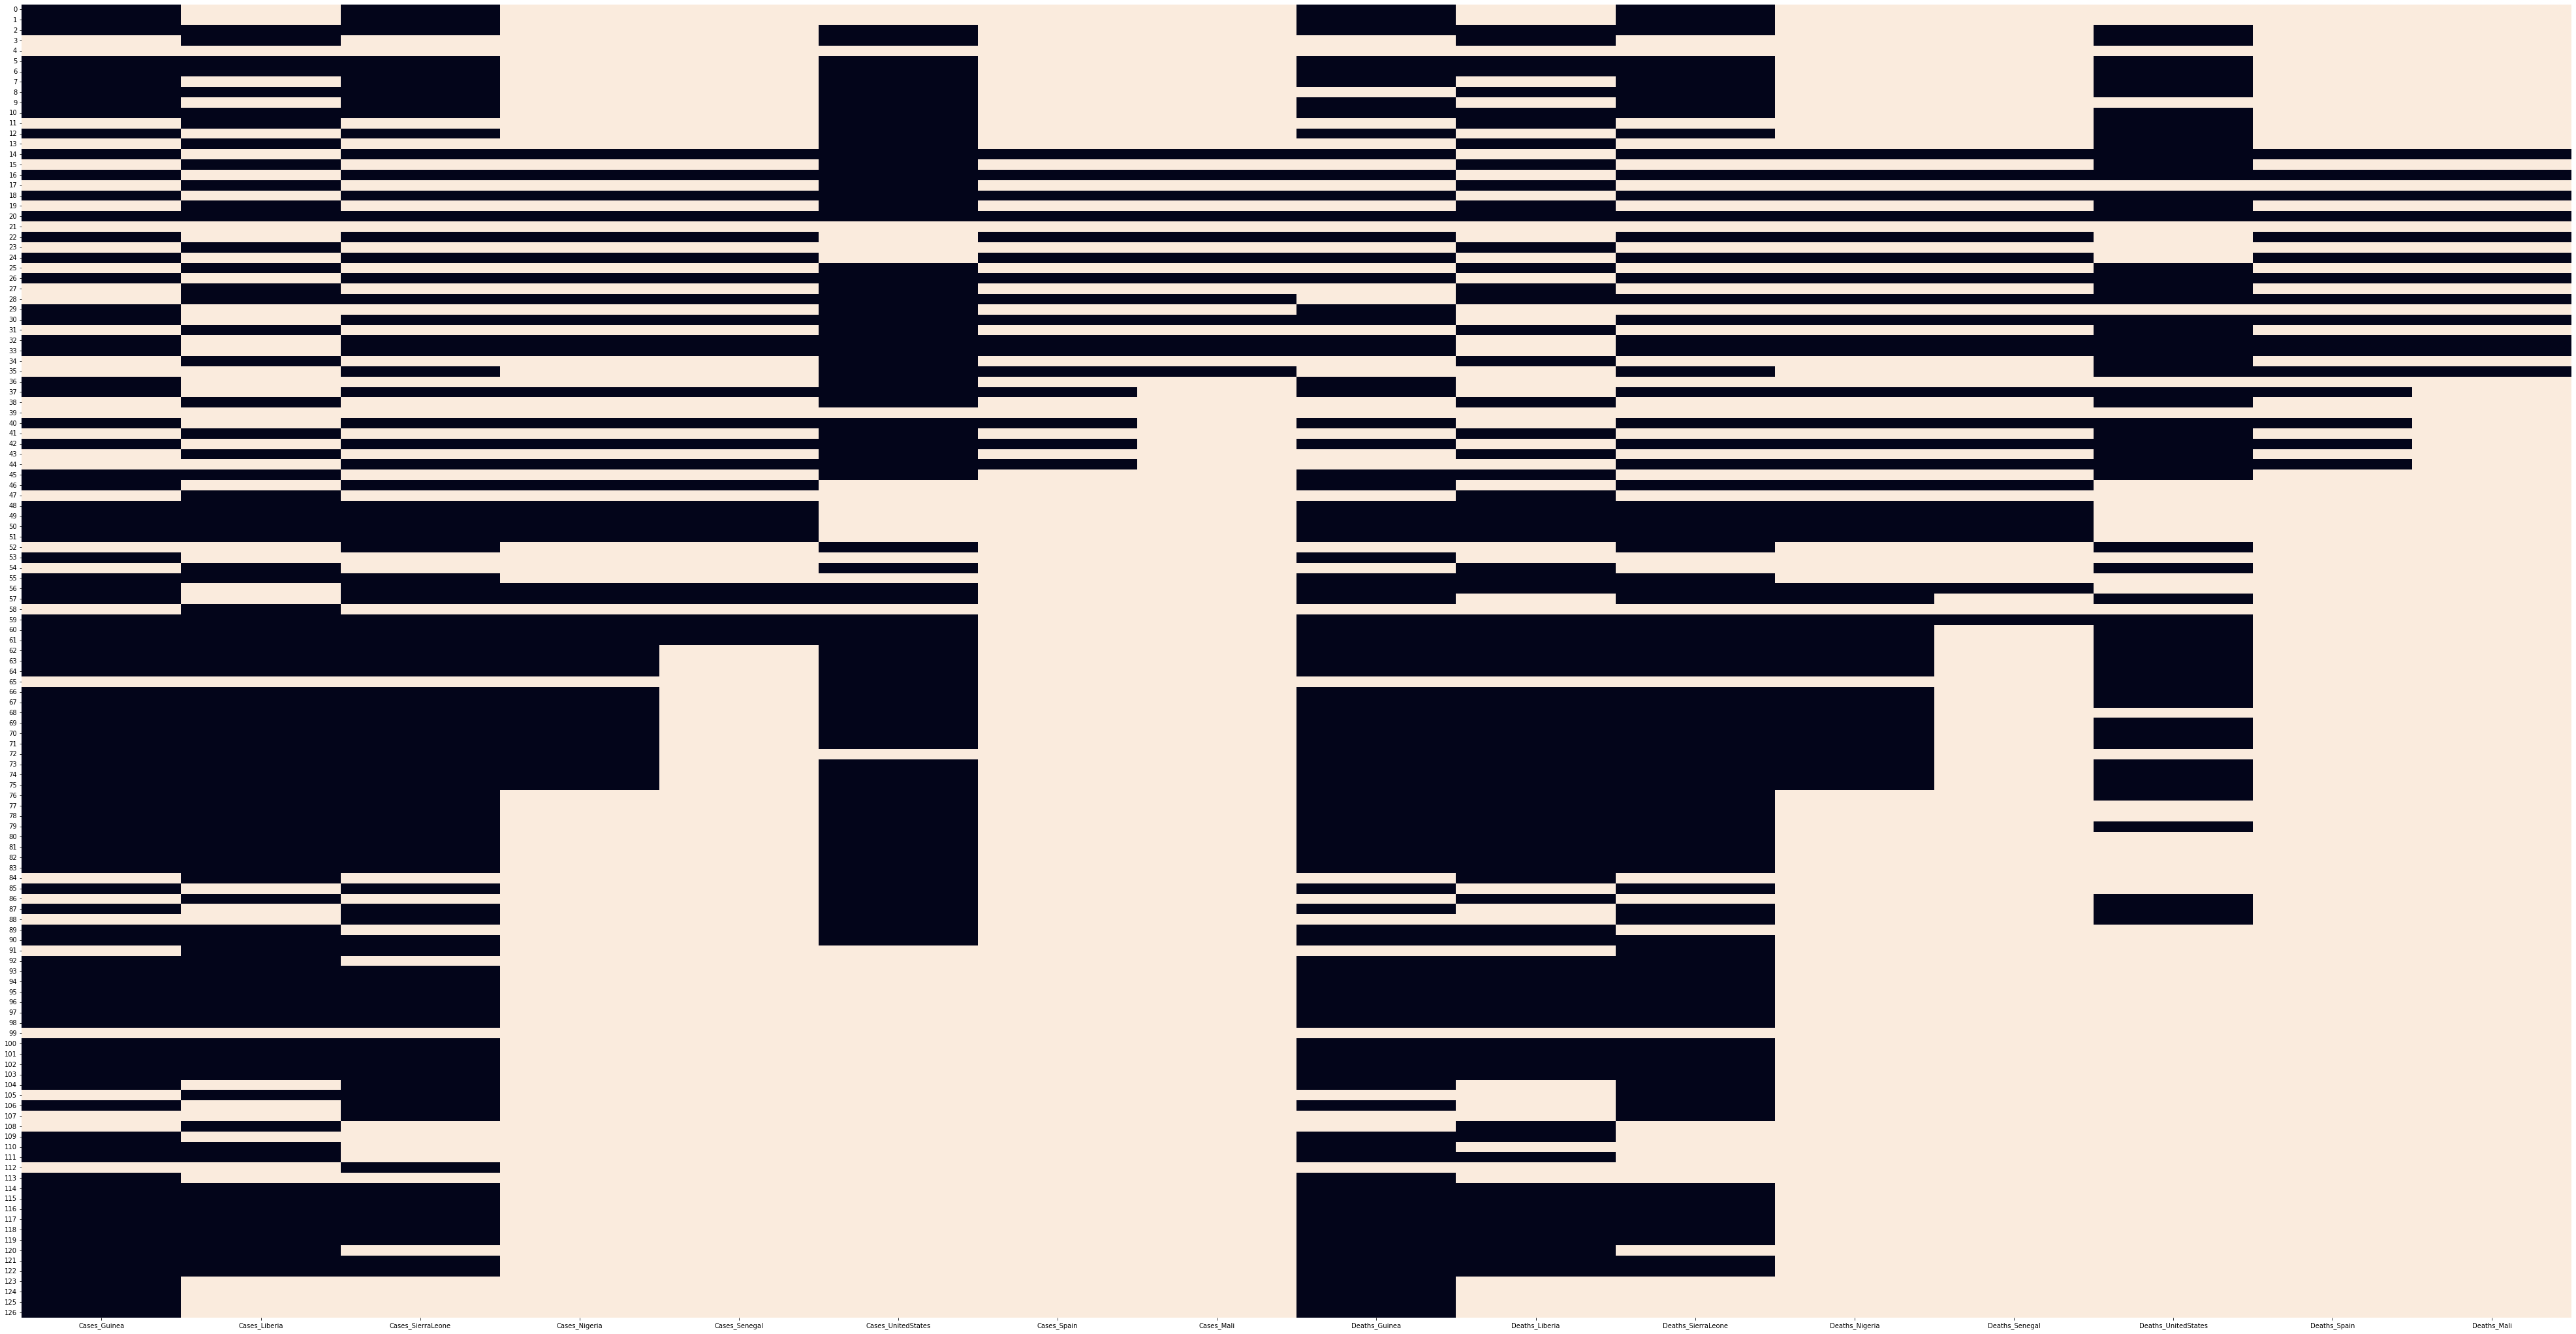

In [9]:
# Create a heatmap of the missing values
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=[70,37]
sns.heatmap(df.isnull(), cbar=False)

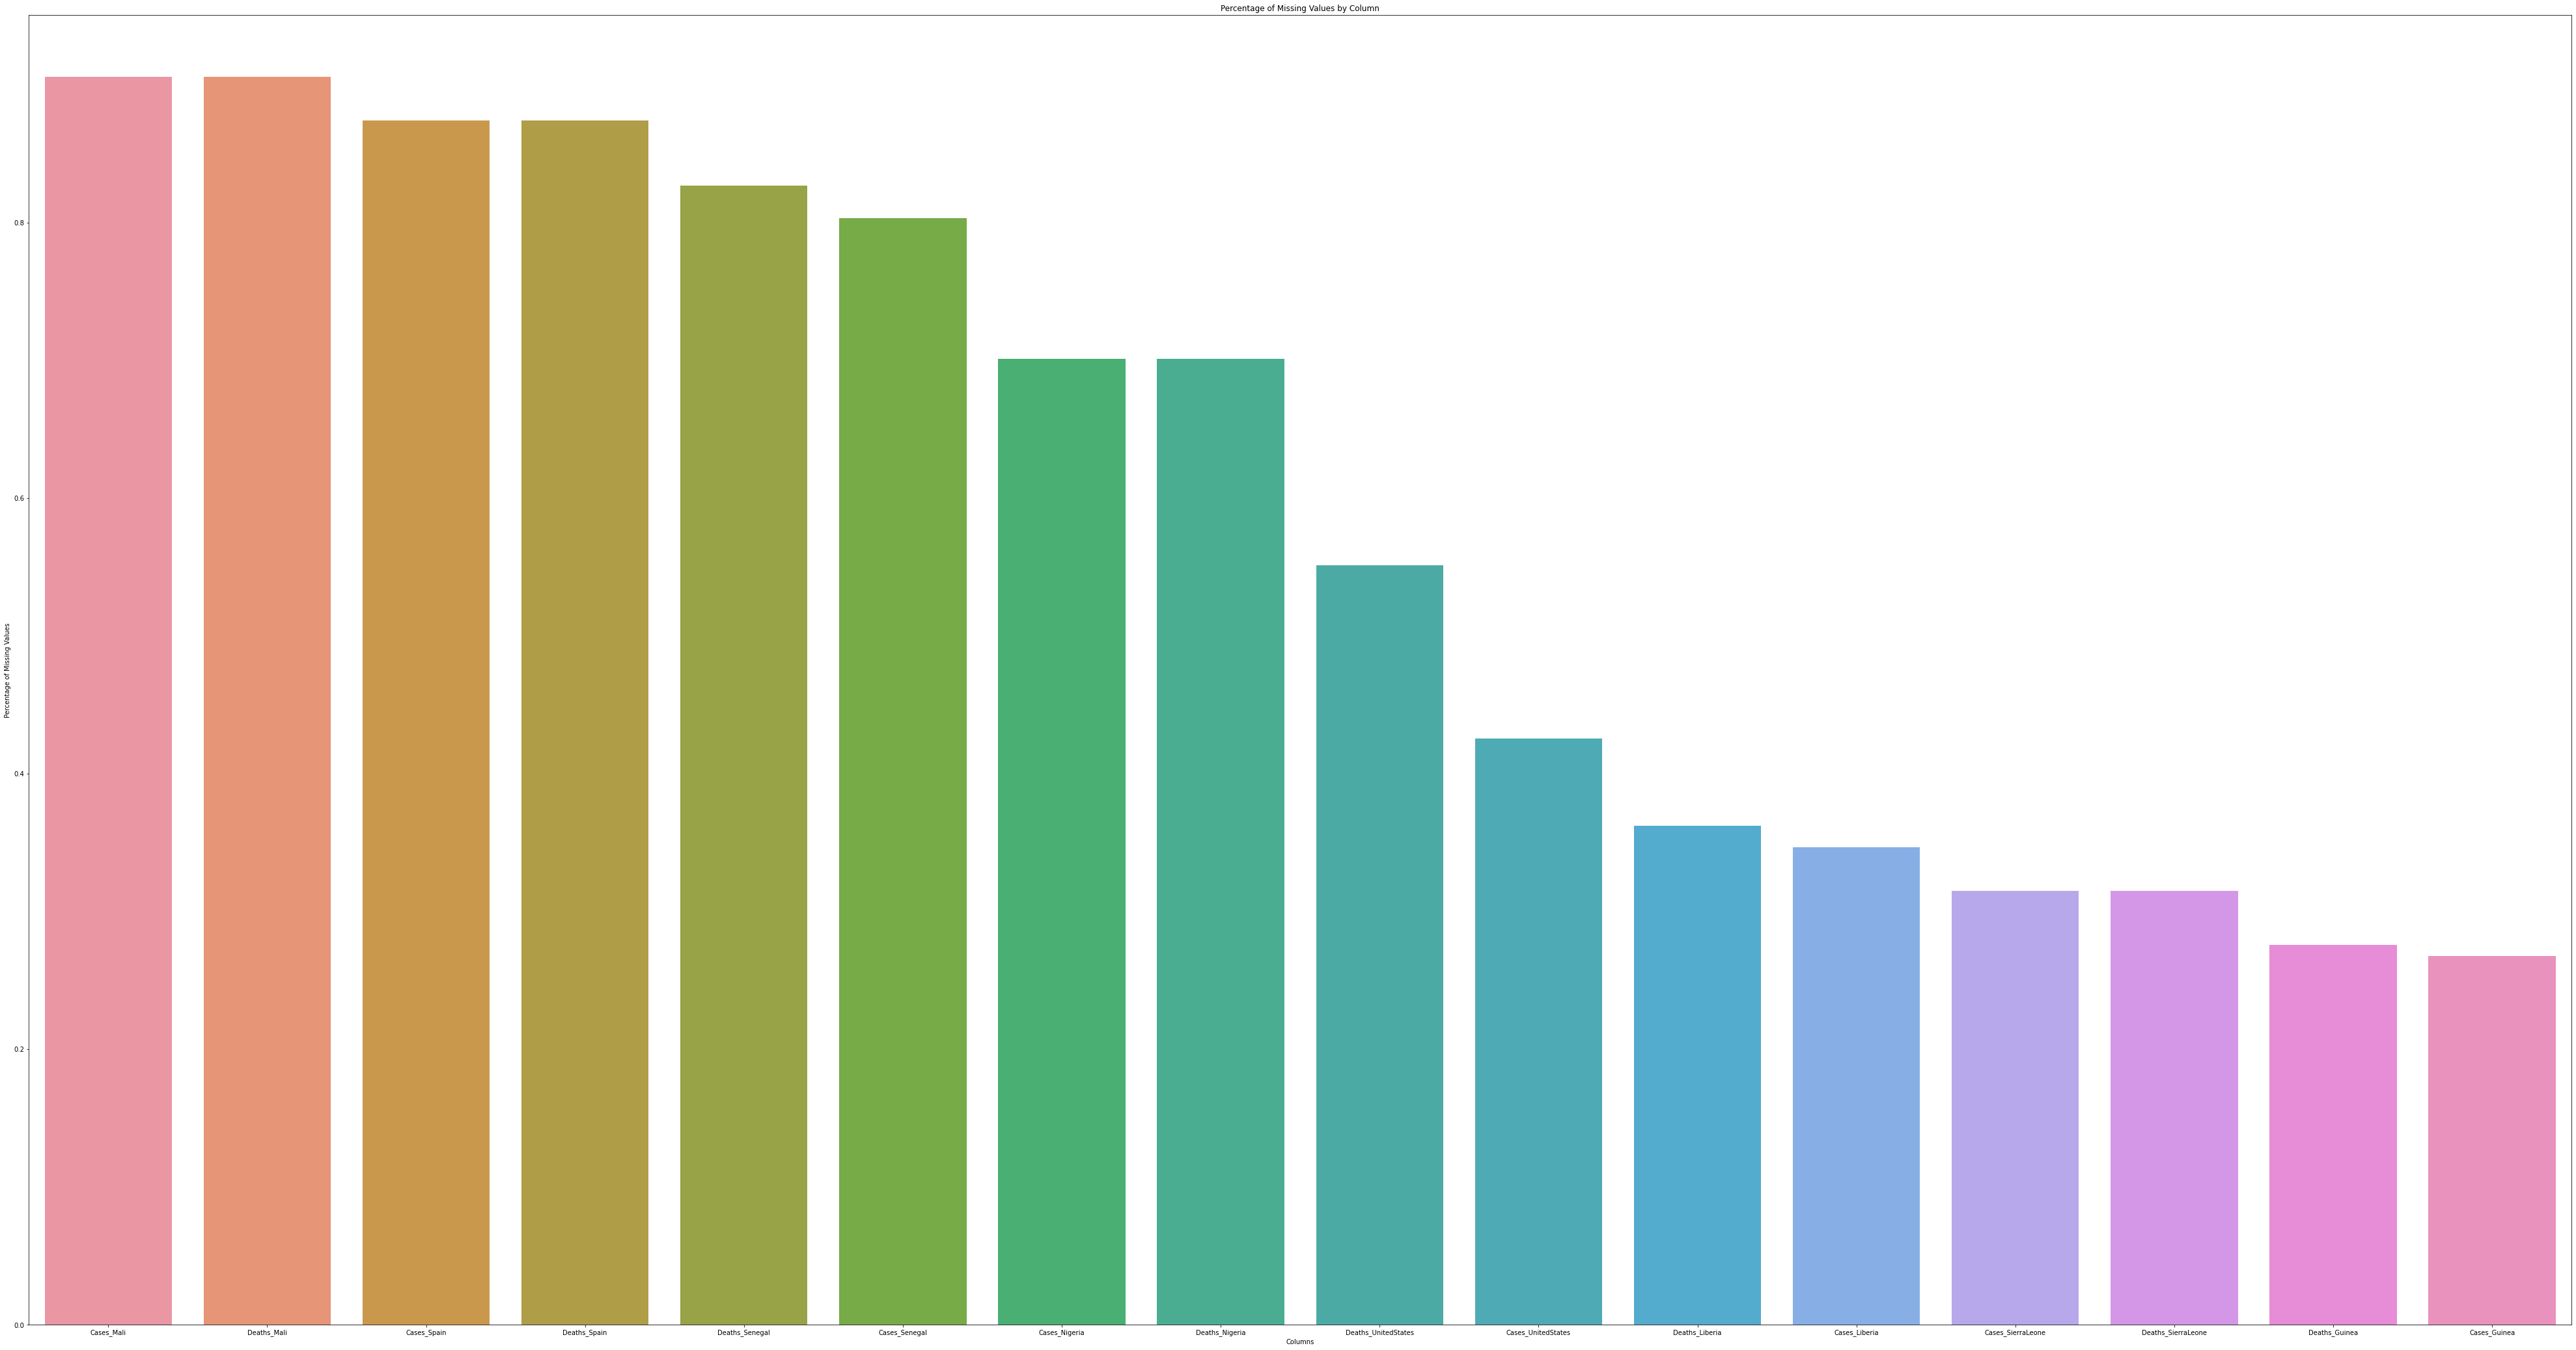

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage of missing values for each column
missing_values_percent = df.isnull().mean()

# Sort the columns by the percentage of missing values
sorted_missing_values = missing_values_percent.sort_values(ascending=False)

# Create a barplot of the sorted missing values
sns.barplot(x=sorted_missing_values.index, y=sorted_missing_values)

# Add labels to the plot
plt.rcParams["figure.figsize"]=[70,17]
plt.xlabel("Columns")
plt.ylabel("Percentage of Missing Values")
plt.title("Percentage of Missing Values by Column")

# Show the plot
plt.show()

<a id="hmsv"> </a>
## 2. Handling Missing Values

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Eliminate all the records where no more than two observations have been recorded</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
# Identify the records with missing values
df['has_missing'] = df.isnull().any(axis=1)

# Count the number of observations for each record
df['count'] = df.count(axis=1)

# Filter the records that have no more than two observations
df1 = df.loc[df['count'] <= 2]

# Drop the records
df1.drop(df1.index, inplace=True)

# Print the resulting dataset
print(df1)

Empty DataFrame
Columns: [Cases_Guinea, Cases_Liberia, Cases_SierraLeone, Cases_Nigeria, Cases_Senegal, Cases_UnitedStates, Cases_Spain, Cases_Mali, Deaths_Guinea, Deaths_Liberia, Deaths_SierraLeone, Deaths_Nigeria, Deaths_Senegal, Deaths_UnitedStates, Deaths_Spain, Deaths_Mali, has_missing, count]
Index: []


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Cast aside the unnecessary columns from the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:

cols_to_keep = ['Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone', 'Cases_Nigeria',
       'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain', 'Cases_Mali']
cols_to_keep

['Cases_Guinea',
 'Cases_Liberia',
 'Cases_SierraLeone',
 'Cases_Nigeria',
 'Cases_Senegal',
 'Cases_UnitedStates',
 'Cases_Spain',
 'Cases_Mali']

In [13]:
df.columns.nunique()

18

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. How would you treat the missing values of the reported cases from Liberia?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
# Count the number of null values
null_count = df['Cases_Liberia'].isnull().sum()

print(null_count)  # Output: number of null values in the Cases_Liberia column

44


In [15]:
# Calculate the mean
mean = df['Cases_Liberia'].mean()

# Replace nan values with the mean
df['Cases_Liberia'] = df['Cases_Liberia'].fillna(mean)

In [16]:
df['Cases_Liberia'].isnull().sum()

0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. How would you treat the missing values from the reported cases of malaria from the United States of America?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
df['Cases_UnitedStates'].isnull().sum()

54

In [18]:
df['Cases_UnitedStates']=df['Cases_UnitedStates'].fillna(df['Cases_UnitedStates'].mean())

In [19]:
df['Cases_UnitedStates'].isnull().sum()

0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. How should the missing values from the observations recorded in 'Guinea' be dealt with?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
df['Cases_Guinea'].isnull().sum()

34

In [21]:
df['Cases_Guinea'] = df['Cases_Guinea'].fillna(df['Cases_Guinea'].mean())

In [22]:
df['Cases_Guinea'].isnull().sum()

0

## For questions hereon, we shall consider the following dataset.

### About the dataset (House Prices in Melbourne)

The dataset contains different attributes that contribute to the price of the houses in Melbourne.  

Attribute Information:

**Rooms**: Number of rooms

**Type**: h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

**Price**: Price in dollars

**Method**: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn before auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

**Regionname**:  General Region (West, North West, North, Northeast,...)

**Bathroom**: Number of Bathrooms

**Car**: Number of car spots

**Landsize**: Land Size of a house

**Distance**: Distance from CBD (City Centre)

**Bedroom**: Number of Bedrooms

#### Load the house dataset and display the first five records (Use for section 3 to 6)

<a id="out"> </a>
## 3. Outlier Detection Techniques 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Is there a feature in the dataset which could be exempted from outlier treatment?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
df_house = pd.read_csv("house.csv")
df_house

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
0,3,h,1490000,S,Northern Metropolitan,1,1,126,25.2,2
1,3,h,1220000,S,Northern Metropolitan,1,1,202,21.8,2
2,3,h,1420000,S,Northern Metropolitan,1,0,156,21.7,2
3,3,h,1515000,S,Western Metropolitan,2,1,0,18.8,3
4,2,h,670000,S,Western Metropolitan,2,0,134,20.6,3
...,...,...,...,...,...,...,...,...,...,...
4761,3,h,1150000,VB,Southern Metropolitan,2,1,305,18.7,3
4762,3,h,712000,S,South-Eastern Metropolitan,1,0,105,16.0,4
4763,4,h,800000,S,South-Eastern Metropolitan,1,0,120,24.5,3
4764,3,u,747000,S,South-Eastern Metropolitan,1,1,0,22.9,3


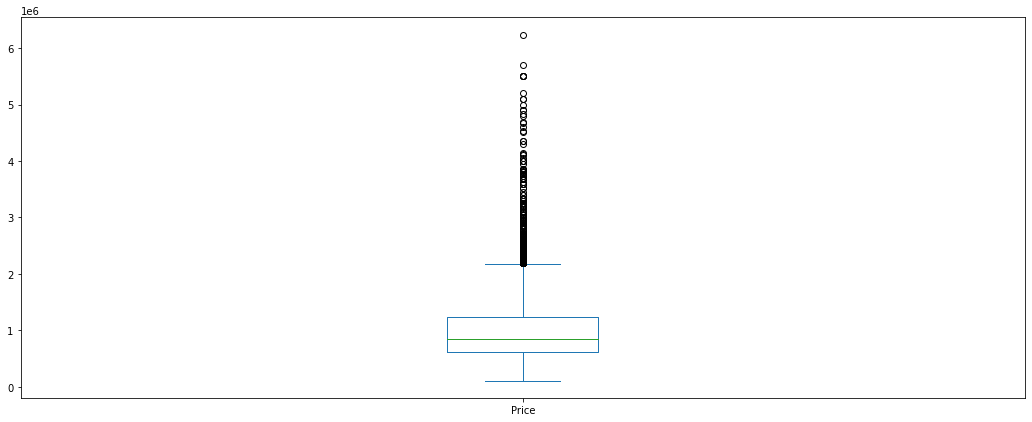

In [24]:
# Plot a box plot of the Price data
plt.rcParams["figure.figsize"]=[18,7]
df_house['Price'].plot.box()

# Show the plot
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. How do we check the outlier values for the feature representing the number of car spots?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
print(df_house.columns)

Index(['Rooms', 'Type', 'Price', 'Method', 'Regionname', 'Bathroom', 'Car',
       'Landsize', 'Distance', 'Bedroom'],
      dtype='object')


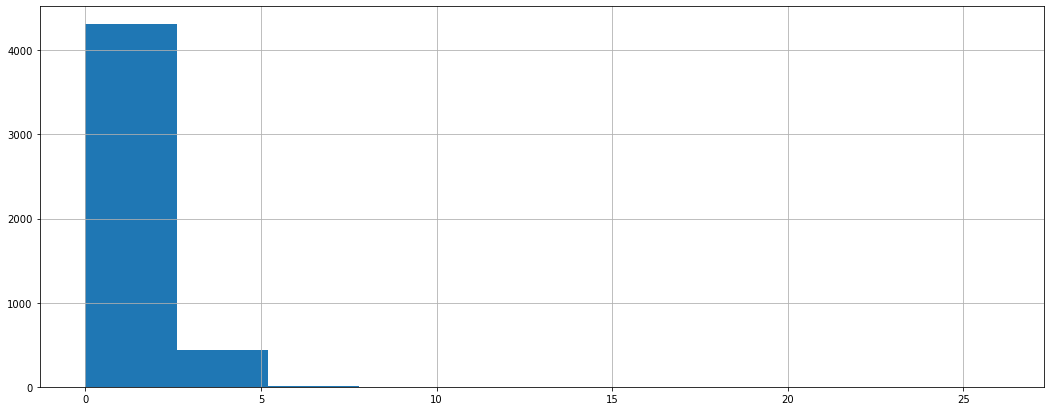

In [26]:
# Calculate the mean and standard deviation of the Car feature
mean = df_house['Car'].mean()
std = df_house['Car'].std()

# Calculate the Z-scores for each value in the Car feature
z_scores = (df_house['Car'] - mean) / std

# Identify outliers as values with a Z-score greater than 3 or less than -3
outliers = df_house[(z_scores > 3) | (z_scores < -3)]

# Plot a histogram of the Car feature
df_house['Car'].hist()

# Show the plot
plt.show()

In [27]:
# Try to access the 'Car' column
car_column = df_house.get('Car')

# Print the result
car_column

0       1
1       1
2       0
3       1
4       0
       ..
4761    1
4762    0
4763    0
4764    1
4765    1
Name: Car, Length: 4766, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Compare the outliers present in the price of real estates by their type
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

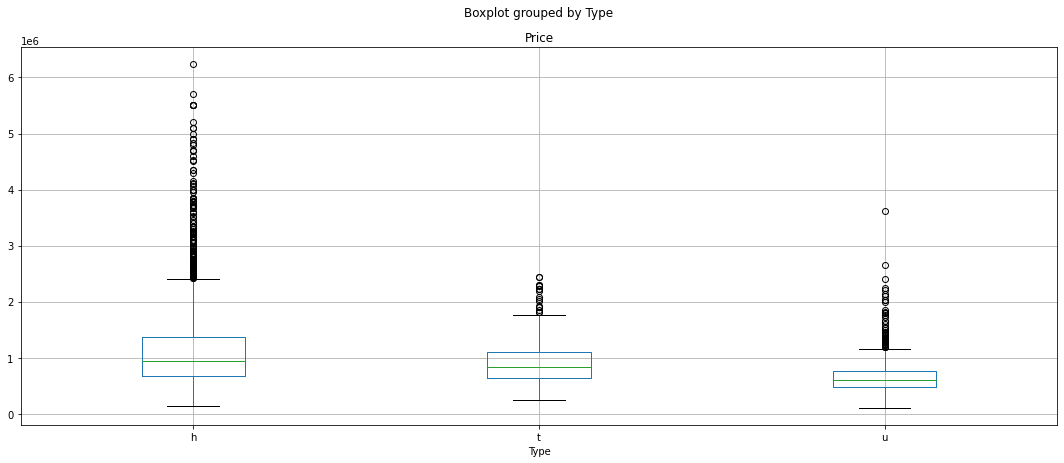

In [28]:
df_house['Price'] = df_house['Price'].astype('object')
# Calculate the mean and standard deviation of the Price feature by Type
mean = df_house.groupby('Type')['Price'].mean()
std = df_house.groupby('Type')['Price'].std()

# Calculate the Z-scores for each value in the Price feature by Type
z_scores = df_house.groupby('Type').apply(lambda x: (x['Price'] - x['Price'].mean()) / x['Price'].std())

# Reset the index of the z_scores Series to remove the Type level
z_scores = z_scores.reset_index(level=0, drop=True)

# Identify outliers as values with a Z-score greater than 3 or less than -3
outliers = df_house[(z_scores > 3) | (z_scores < -3)]

# Plot a box plot of the Price feature by Type
df_house.boxplot(by='Type', column=['Price'])

# Show the plot
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. What would be the extreme values for the feature representing the number of rooms?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [29]:
# Get summary statistics for the Rooms feature
rooms_stats = df_house['Rooms'].describe()

print(rooms_stats)

count    4766.000000
mean        3.083718
std         0.937456
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         8.000000
Name: Rooms, dtype: float64


From these summary statistics, you can see that the minimum value for the Rooms feature is 1 and the maximum value is 12. These are the extreme values for this feature.

In [30]:
# Get the minimum and maximum values of the Rooms feature
min_rooms = df_house['Rooms'].min()
max_rooms = df_house['Rooms'].max()

print(f"Minimum number of rooms: {min_rooms}")
print(f"Maximum number of rooms: {max_rooms}")

Minimum number of rooms: 1
Maximum number of rooms: 8


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Suggest a method to find the outlier values for the feature representing the number of bathrooms
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [31]:
# Calculate the mean and standard deviation of the Bathroom feature
mean = df_house['Bathroom'].mean()
std = df_house['Bathroom'].std()

In [32]:
# Calculate the Z-scores for each value in the Bathroom feature
z_scores = (df_house['Bathroom'] - mean) / std

In [33]:
# Identify outliers as values with a Z-score greater than 3 or less than -3
outliers = df_house[(z_scores > 3) | (z_scores < -3)]
print(outliers)

      Rooms Type    Price Method                  Regionname  Bathroom  Car  \
103       3    t   385000      S       Northern Metropolitan         7    0   
122       3    t   950000      S        Eastern Metropolitan         4    4   
229       1    u   337000      S  South-Eastern Metropolitan         4    2   
382       3    h   720000      S        Western Metropolitan         5    2   
448       3    h  1116000      S       Southern Metropolitan         5    4   
...     ...  ...      ...    ...                         ...       ...  ...   
4093      2    u   560000     PI       Southern Metropolitan         4    2   
4132      2    u   600000      S       Southern Metropolitan         4    2   
4497      4    h  1730000      S       Southern Metropolitan         4    3   
4681      3    h   870000     VB        Western Metropolitan         4    3   
4719      2    u   780000      S        Eastern Metropolitan         4    2   

      Landsize  Distance  Bedroom  
103        435 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Extract the records corresponding to the extreme outliers present in the feature representing the number of bedrooms
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [34]:
# Calculate the mean and standard deviation of the Bedroom feature
mean = df_house['Bedroom'].mean()
std = df_house['Bedroom'].std()

In [35]:
# Calculate the Z-scores for each value in the Bedroom feature
z_scores = (df_house['Bedroom'] - mean) / std

In [36]:
# Identify extreme outliers as values with a Z-score greater than 3 or less than -3
extreme_outliers = df_house[(z_scores > 3) | (z_scores < -3)]
extreme_outliers 

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
130,3,h,900000,S,Eastern Metropolitan,1,1,180,21.3,7
279,3,t,1100000,S,Southern Metropolitan,1,1,0,12.1,8
467,2,u,612000,S,South-Eastern Metropolitan,1,2,766,27.1,9
752,3,t,891000,S,Western Metropolitan,1,1,632,18.2,7
761,1,u,401000,S,Southern Metropolitan,1,2,624,20.6,7
891,4,h,1200000,S,Eastern Metropolitan,2,1,316,28.4,7
920,3,h,600000,S,Northern Metropolitan,2,1,281,23.2,7
1228,3,h,470000,PI,Western Metropolitan,2,2,486,20.9,9
1816,3,h,1037000,S,Northern Metropolitan,1,1,820,18.7,7
1937,3,h,496000,S,Western Metropolitan,1,1,0,21.7,30


The extreme_outliers DataFrame will contain the rows in the original dataset that correspond to extreme outlier values in the Bedroom feature. 

<a id="odt"> </a>
## 4. Treatment of Outliers

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. What is the change in the average distance after handling the outliers using IQR method in the feature representing the distance?  
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [37]:
original_average_distance = df_house['Distance'].mean()
# Calculate the first and third quartiles of the Distance feature
q1 = df_house['Distance'].quantile(0.25)
q3 = df_house['Distance'].quantile(0.75)
print(q1)
print(q3)

16.5
22.2


In [38]:
# Calculate the IQR as the difference between Q3 and Q1
iqr = q3 - q1
print(iqr)

5.699999999999999


In [39]:
# Identify outliers as values that are less than Q1 - 1.5 * IQR or greater than Q3 + 1.5 * IQR
outliers = df_house[(df_house['Distance'] < q1 - 1.5 * iqr) | (df_house['Distance'] > q3 + 1.5 * iqr)]
print(outliers)

      Rooms Type    Price Method                  Regionname  Bathroom  Car  \
175       5    h  1100000     PI        Eastern Metropolitan         2    1   
292       3    h  1400000      S       Southern Metropolitan         2    2   
314       2    h  1110000      S       Northern Metropolitan         1    0   
343       3    t   667500     SP        Western Metropolitan         2    1   
469       6    h  1856000     SP        Eastern Metropolitan         1    1   
602       2    h   560000      S       Northern Metropolitan         2    1   
617       5    h   870000      S  South-Eastern Metropolitan         1    2   
801       4    h  2500000      S       Southern Metropolitan         1    2   
887       3    h  1130000      S  South-Eastern Metropolitan         2    2   
1032      2    u   670000     PI       Southern Metropolitan         3    2   
1034      5    h  2260000      S       Southern Metropolitan         1    2   
1332      2    t   675000     SP       Northern Metr

In [40]:
# Remove the identified outliers from the dataset
df_house1 = df_house[~df_house.isin(outliers)].dropna()
df_house1

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
0,3.0,h,1490000,S,Northern Metropolitan,1.0,1.0,126.0,25.2,2.0
1,3.0,h,1220000,S,Northern Metropolitan,1.0,1.0,202.0,21.8,2.0
2,3.0,h,1420000,S,Northern Metropolitan,1.0,0.0,156.0,21.7,2.0
3,3.0,h,1515000,S,Western Metropolitan,2.0,1.0,0.0,18.8,3.0
4,2.0,h,670000,S,Western Metropolitan,2.0,0.0,134.0,20.6,3.0
...,...,...,...,...,...,...,...,...,...,...
4761,3.0,h,1150000,VB,Southern Metropolitan,2.0,1.0,305.0,18.7,3.0
4762,3.0,h,712000,S,South-Eastern Metropolitan,1.0,0.0,105.0,16.0,4.0
4763,4.0,h,800000,S,South-Eastern Metropolitan,1.0,0.0,120.0,24.5,3.0
4764,3.0,u,747000,S,South-Eastern Metropolitan,1.0,1.0,0.0,22.9,3.0


In [41]:
# Calculate the average distance after handling the outliers
average_distance = df_house1['Distance'].mean()
average_distance

19.311425554382247

In [42]:
# Calculate the change in the average distance
# Calculate the original average distance
change_in_average_distance = average_distance - original_average_distance
change_in_average_distance

-0.016921067522904565

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. What should be the range (K*IQR) considered to eliminate the extreme outliers for the feature representing the house price? 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [43]:
# Set the value of K
K = 1.5

# Calculate the IQR for the Price feature
q1 = df_house['Price'].quantile(0.25)
q3 = df_house['Price'].quantile(0.75)
iqr = q3 - q1

# Remove extreme outliers from the Price feature
df_house2 = df_house[(df_house['Price'] > (q1 - K * iqr)) & (df_house['Price'] < (q3 + K * iqr))]
K*iqr

936375.0

<a id="fe"> </a>
## 5. Feature Engineering

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Categorize the houses in three groups based on their distance from CBD and create a new feature containing the group labels
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [44]:
# Calculate the IQR of the Distance feature
iqr = df_house['Distance'].quantile(0.75) - df_house['Distance'].quantile(0.25)

# Find the lower and upper bounds of the range using the IQR and the first and third quartiles
lower_bound = df_house['Distance'].quantile(0.25) - (1.5 * iqr)
upper_bound = df_house['Distance'].quantile(0.75) + (1.5 * iqr)

# Create the Distance_Group feature
df_house['Distance_Group'] = 'Low'
df_house.loc[(df_house['Distance'] >= lower_bound) & (df_house['Distance'] < upper_bound), 'Distance_Group'] = 'Medium'
df_house.loc[df_house['Distance'] >= upper_bound, 'Distance_Group'] = 'High'
print(df_house['Distance_Group'])

0       Medium
1       Medium
2       Medium
3       Medium
4       Medium
         ...  
4761    Medium
4762    Medium
4763    Medium
4764    Medium
4765    Medium
Name: Distance_Group, Length: 4766, dtype: object


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Compare the house prices based on the different distance levels 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [45]:
# Categorize houses into three groups based on distance from CBD
def distance_level(distance):
  if distance <= 5:
    return 'Near'
  elif distance <= 15:
    return 'Moderate'
  else:
    return 'Far'

df_house['Distance_Level'] = df_house['Distance'].apply(distance_level)

In [46]:
# Group the data by Distance_Group and calculate the mean price for each group
mean_price_by_distance = df_house.groupby('Distance_Level')['Price'].mean()
print(mean_price_by_distance)

Distance_Level
Far         1.018983e+06
Moderate    1.023655e+06
Near        3.650000e+05
Name: Price, dtype: float64


In [47]:
df_grouped = df_house.groupby('Distance_Level')
df_grouped

In [48]:
df_house.columns

Index(['Rooms', 'Type', 'Price', 'Method', 'Regionname', 'Bathroom', 'Car',
       'Landsize', 'Distance', 'Bedroom', 'Distance_Group', 'Distance_Level'],
      dtype='object')

<AxesSubplot:title={'center':'Price'}, xlabel='Distance_Level'>

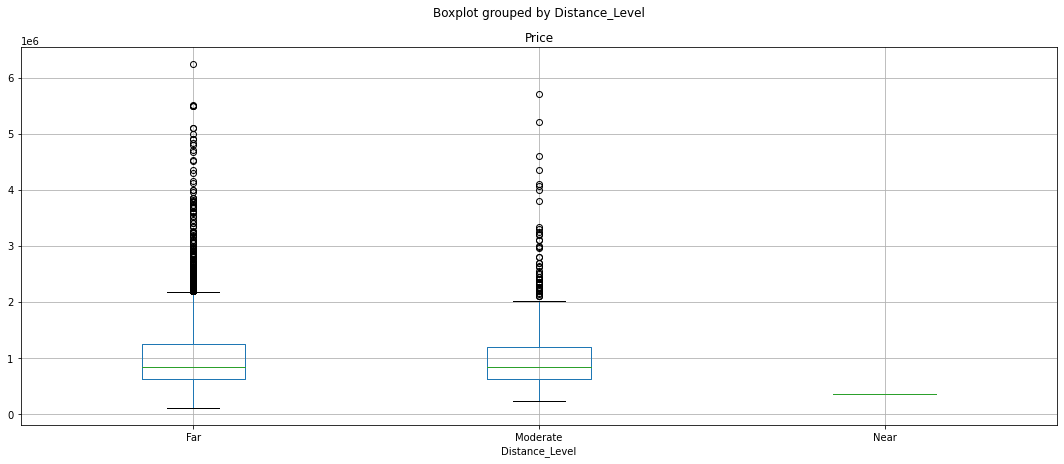

In [49]:
df_house.boxplot(column='Price', by='Distance_Level')

<a id="split"> </a>
## 6. Train-Test Split

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Split the price of houses in the proportion 80:20 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [51]:
from sklearn.model_selection import train_test_split
X = df_house[['Rooms', 'Type', 'Distance']]
y = df_house['Price']
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [52]:
print("X_train:", X_train)
print("X_test:", X_test)
print("y_train:", y_train)
print("y_test:", y_test)

X_train:       Rooms Type  Distance
1382      4    h      22.1
3443      4    h       9.5
1117      3    h      13.0
1871      2    h      18.1
2893      4    h      14.3
...     ...  ...       ...
3314      4    h      14.0
3053      3    t      21.5
2323      5    h      22.9
4682      3    h       9.9
1111      2    u      19.9

[3812 rows x 3 columns]
X_test:       Rooms Type  Distance
267       1    u      25.5
3513      3    t      18.7
4602      3    h      20.1
61        4    h      16.6
4650      5    h      18.5
...     ...  ...       ...
4355      3    h      17.4
3343      2    u       9.9
4378      2    h      19.6
3394      3    h      14.6
146       3    h      16.2

[954 rows x 3 columns]
y_train: 1382     850000
3443    2640000
1117    1265000
1871    1286000
2893     890000
         ...   
3314     955000
3053    1020000
2323    1550000
4682    2400000
1111     691000
Name: Price, Length: 3812, dtype: object
y_test: 267      420000
3513    1750000
4602    1410000
61  